In [74]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

JSPAINT_DATASET_DIR = 'jspaint_dataset'
DRAWING_DIRS = ['00']

In [96]:
def get_trajectories(files):
    # Returns list of np arrays, where each array is (N, 3)
    trajectories = []
    for file in files:
        with open(os.path.join(JSPAINT_DATASET_DIR, file, 'trajectories.json'), 'r') as f:
            data = json.load(f)
            for traj in data:
                traj = np.array(traj)
                # reflect y axis
                traj[:, 1] = 1 - traj[:, 1]
                trajectories.append(traj)
    return trajectories

def plot_trajectory(ax, trajectory):
    # Draw line through trajectory points
    ax.plot(trajectory[:, 0], trajectory[:, 1], c='black', linewidth=0.5)

    # Draw small dots at trajectory points based on value of z-coordinate
    ax.scatter(trajectory[:, 0], trajectory[:, 1], c=trajectory[:, 2], s=1)

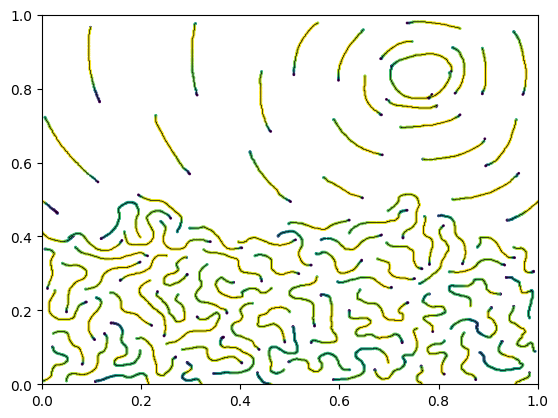

In [97]:
trajectories = get_trajectories(DRAWING_DIRS)
_, ax = plt.subplots()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
for traj in trajectories:
    plot_trajectory(ax, traj)

In [98]:
def normalize_trajectory(trajectory):
    # trajectory: (N, 3)
    traj = trajectory.copy()

    # Make traj start at [0,0]
    traj[:, 0] = traj[:, 0] - traj[0, 0]
    traj[:, 1] = traj[:, 1] - traj[0, 1]

    # Rotate traj about [0,0] so that it ends on y-coordinate 0
    last_point = traj[-1]
    angle = -np.arctan2(last_point[1], last_point[0])
    new_traj = np.zeros_like(traj)
    new_traj[:, 0] = traj[:, 0] * np.cos(angle) - traj[:, 1] * np.sin(angle)
    new_traj[:, 1] = traj[:, 0] * np.sin(angle) + traj[:, 1] * np.cos(angle)
    new_traj[:, 2] = traj[:, 2]
    traj = new_traj

    return traj

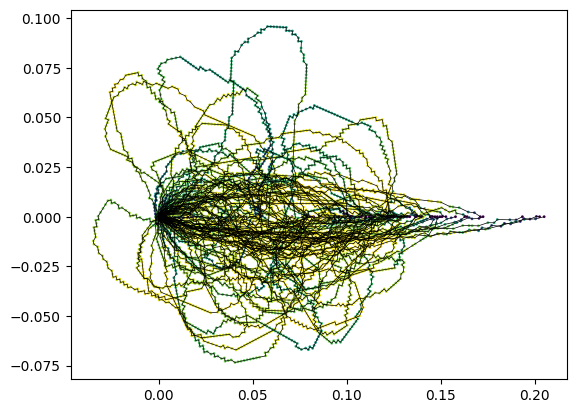

In [100]:
# Plot normalized trajectories
normalized_trajectories = normalize_trajectories(trajectories)
_, ax = plt.subplots()
for traj in normalized_trajectories:
    plot_trajectory(ax, traj)
plt.show()

In [ ]:
def downsample_trajectory():
    